In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-data/bank.csv
/kaggle/input/bank-data/bank-full.csv


In [66]:
import warnings
warnings.filterwarnings("ignore")


# Importing and Analysing 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Load the CSV file with proper separator
df = pd.read_csv('/kaggle/input/bank-data/bank-full.csv', sep=';')

# Display the first few rows and basic info
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
num_cols = df.select_dtypes(include='number')
cat_cols = df.select_dtypes(include='object')

In [9]:
num_cols

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [10]:
cat_cols

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


# Visualising

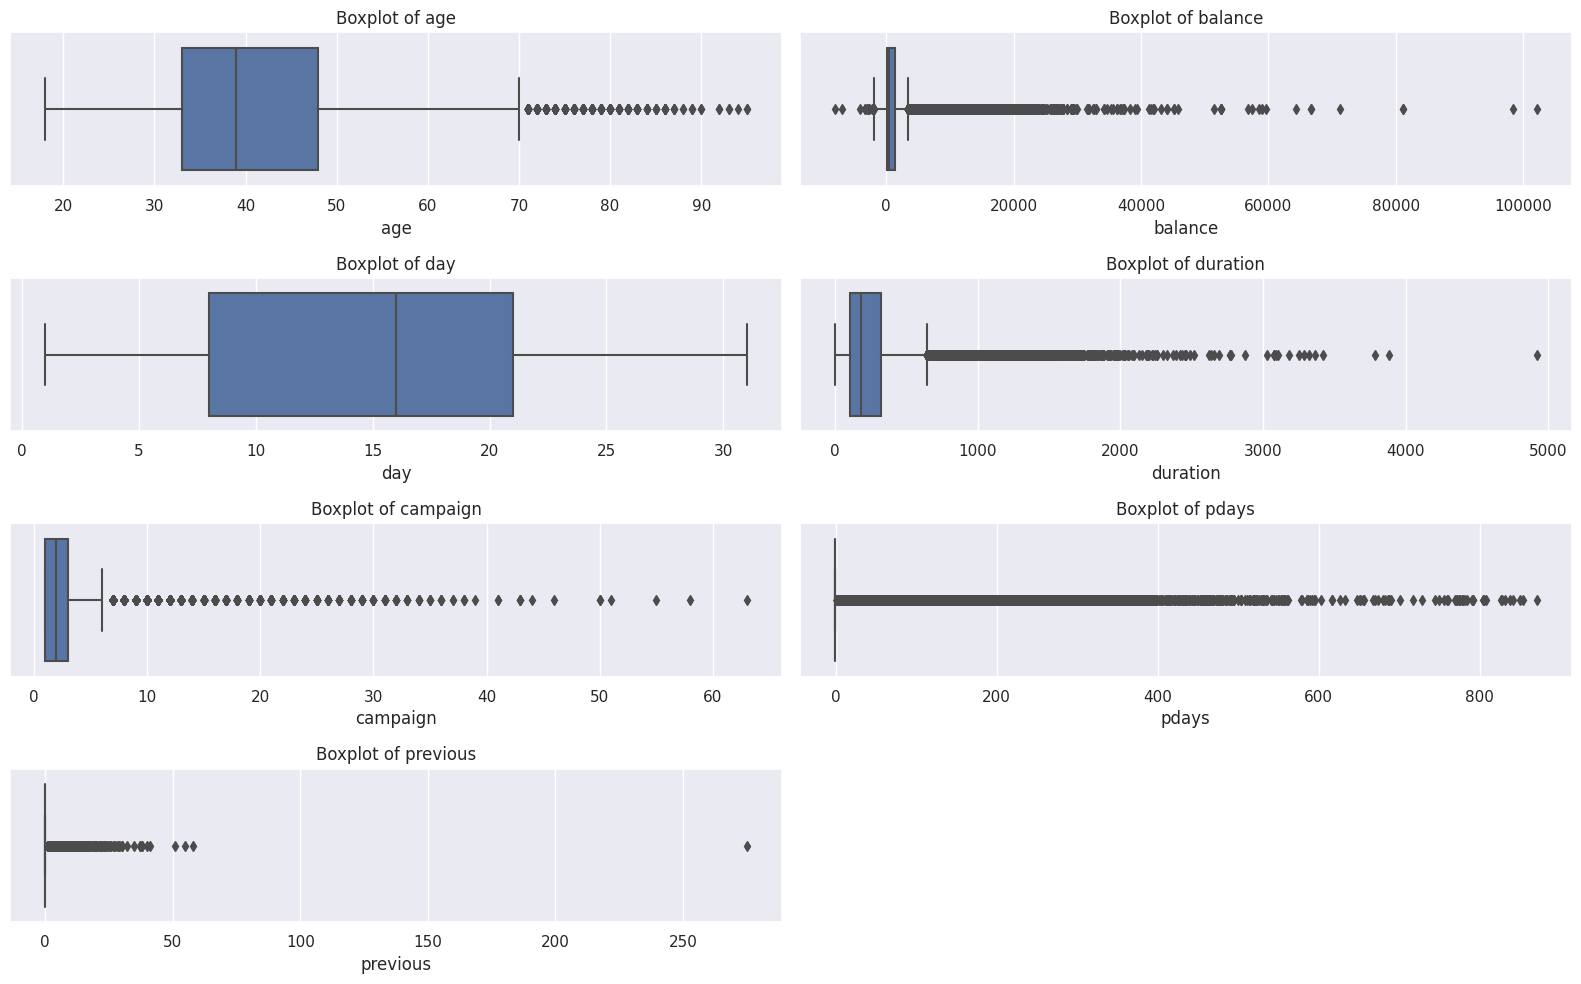

In [11]:
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
for i, column in enumerate(num_cols.columns):
    plt.subplot(len(num_cols.columns)//2 + 1, 2, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

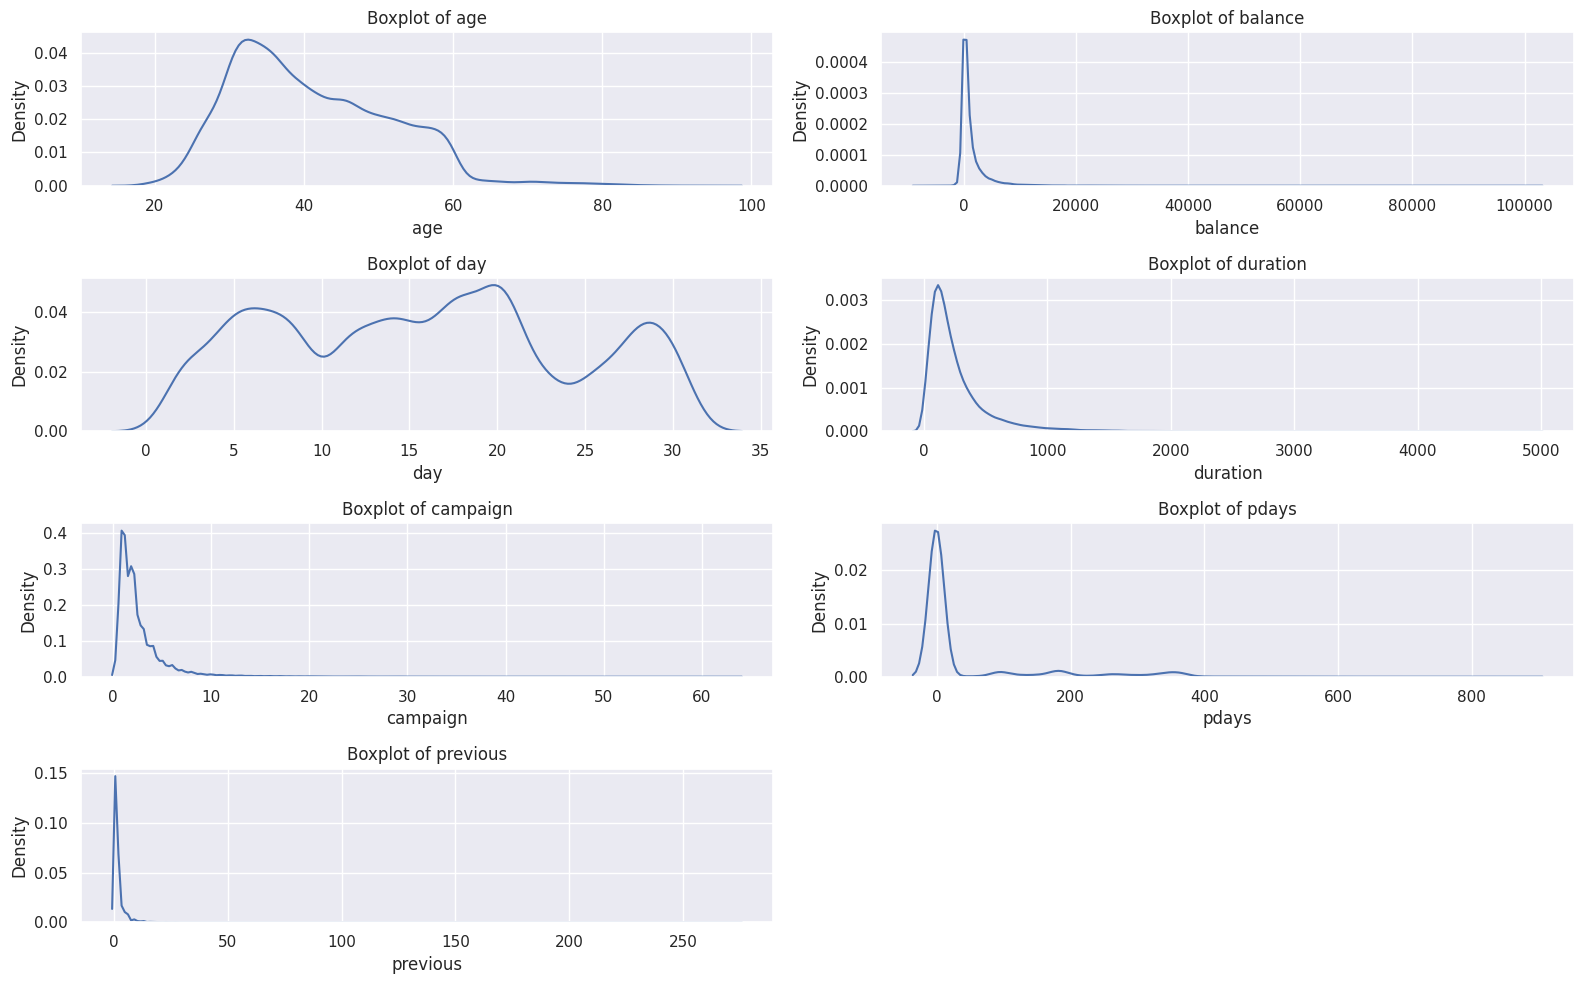

In [12]:
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
for i, column in enumerate(num_cols.columns):
    plt.subplot(len(num_cols.columns)//2 + 1, 2, i + 1)
    sns.kdeplot(x=df[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Highly Skewed Data

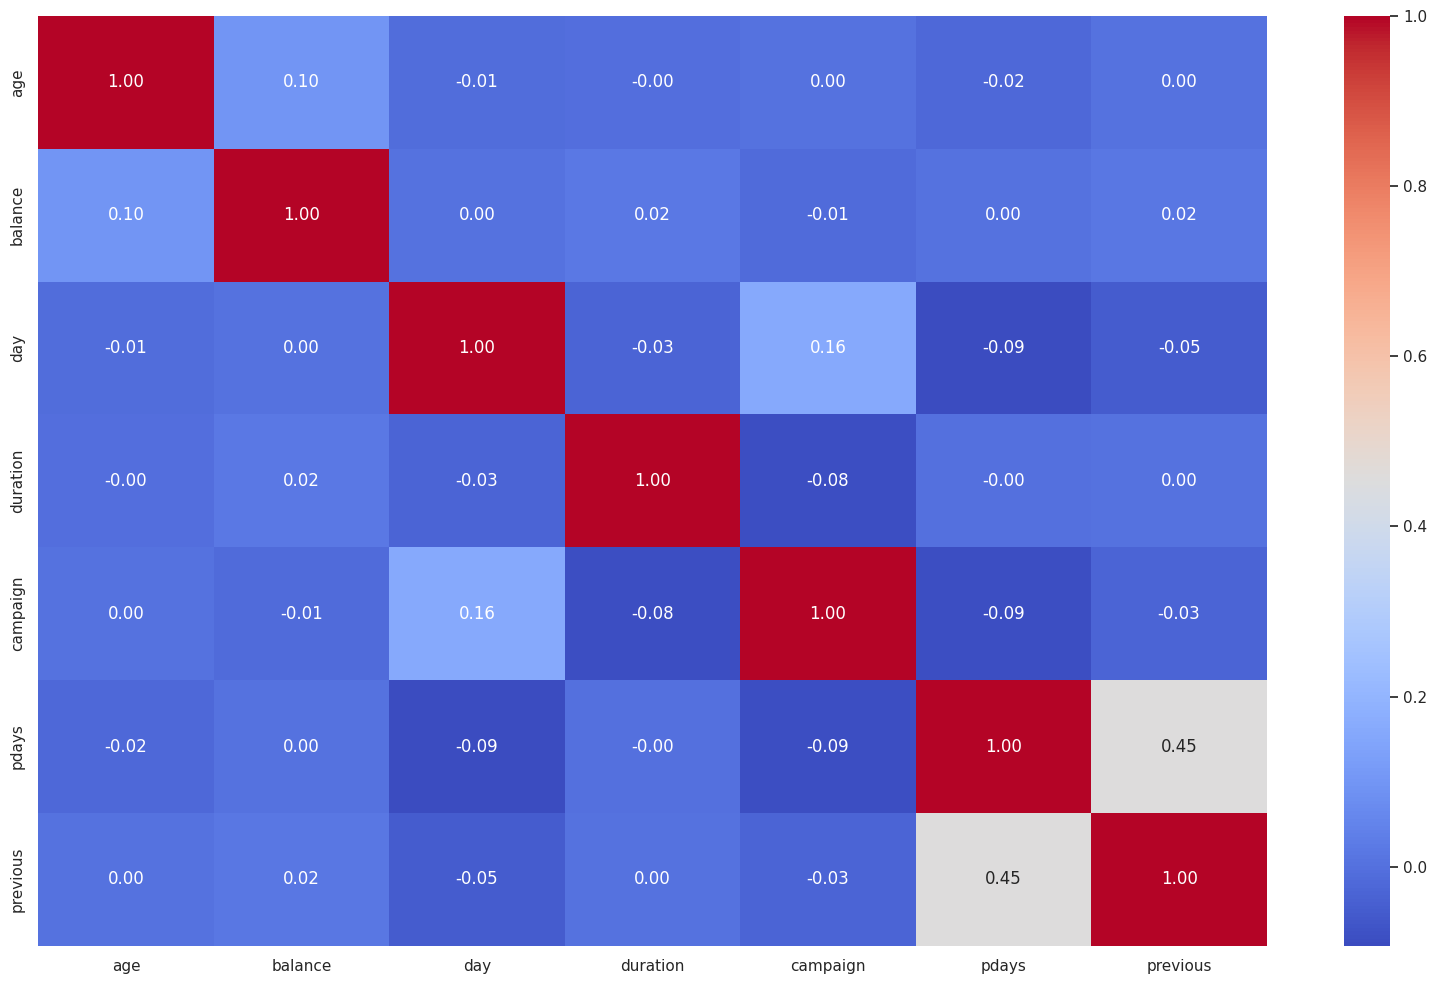

In [13]:
plt.figure(figsize=(16, 10))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

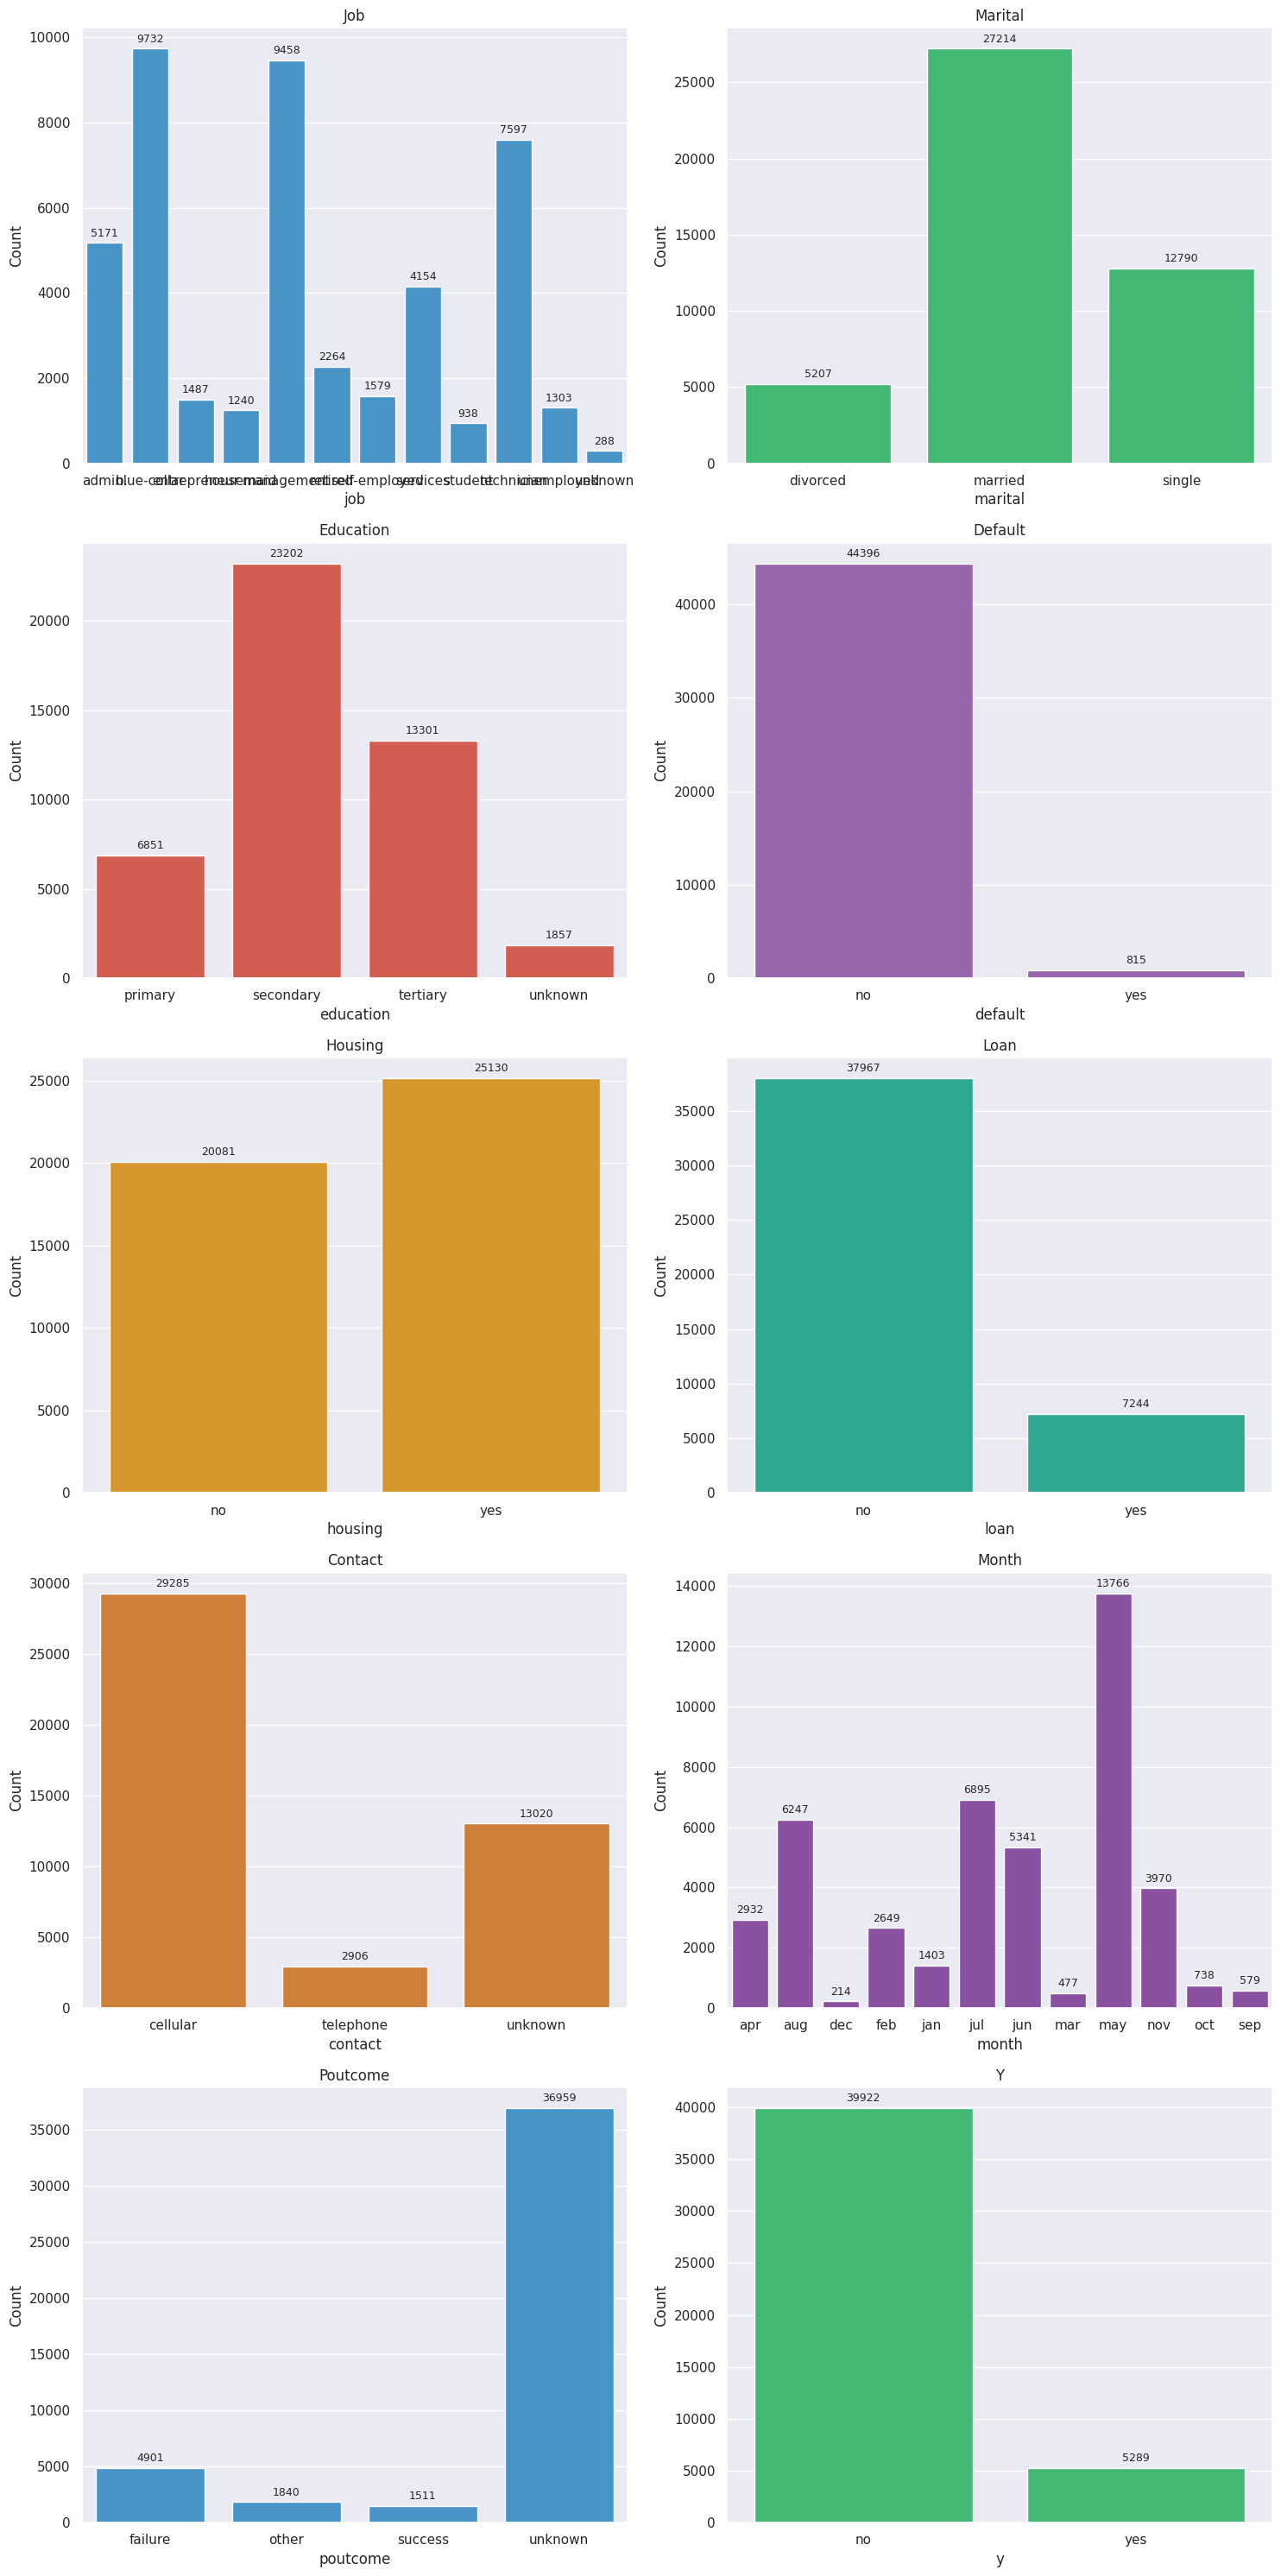

In [14]:
# Set figure size for better readability
plt.figure(figsize=(15, 30))

# List of colors for the plots
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12', '#1abc9c', '#e67e22', '#8e44ad']

# Plot each categorical column
for i, column in enumerate(cat_cols.columns):
    counts = df[column].value_counts().sort_index()
    plt.subplot((len(cat_cols.columns) + 1) // 2, 2, i + 1)
    sns.barplot(x=counts.index, y=counts.values, color=colors[i % len(colors)])
    plt.title(column.replace('_', ' ').title())
    plt.xlabel(column)
    plt.ylabel('Count')
    # Annotate counts above each bar
    for j, count in enumerate(counts):
        plt.text(j, count + (max(counts) * 0.01), str(count), ha='center', va='bottom', fontsize=9)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [15]:
cat_cols.nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

In [16]:
num_cols.nunique()

age           77
balance     7168
day           31
duration    1573
campaign      48
pdays        559
previous      41
dtype: int64

<Axes: xlabel='age', ylabel='marital'>

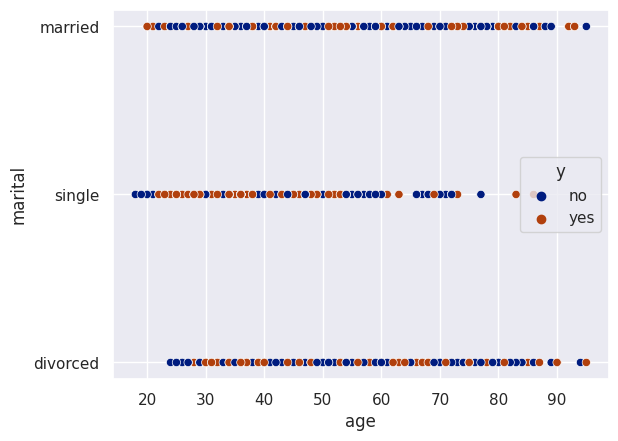

In [17]:
sns.scatterplot(x=df['age'],y=df['marital'],hue=df['y'],palette='dark')

<Axes: xlabel='age', ylabel='job'>

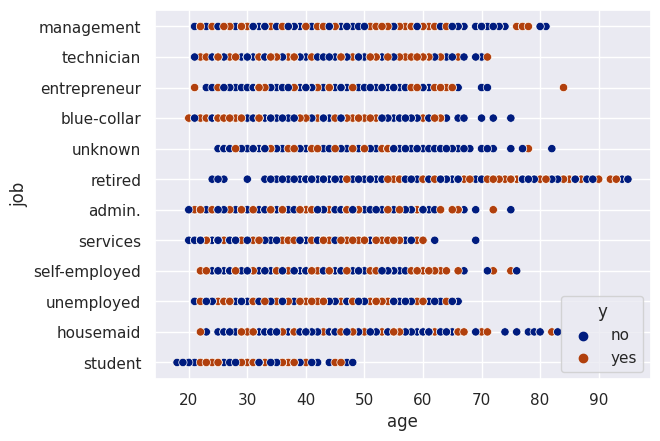

In [18]:
sns.scatterplot(x=df['age'],y=df['job'],hue=df['y'],palette='dark')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='default', ylabel='balance'>

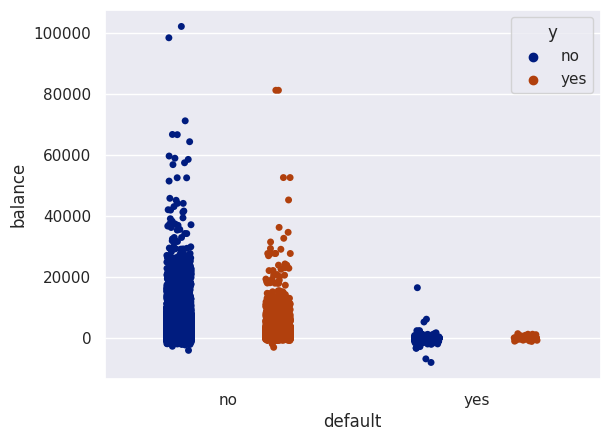

In [19]:
sns.stripplot(x='default', y='balance', hue='y', data=df, palette='dark', dodge=True)


<Axes: xlabel='previous', ylabel='pdays'>

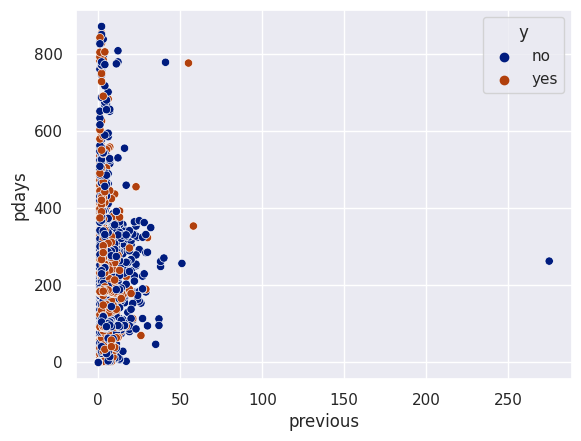

In [20]:
sns.scatterplot(x=df['previous'],y=df['pdays'],hue=df['y'],palette='dark')

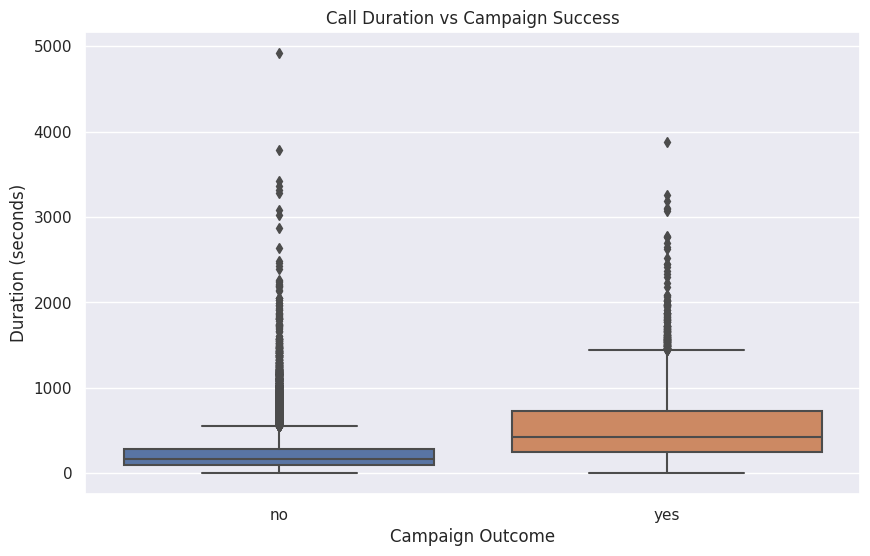

In [21]:
# Campaign Duration vs Success
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=df)
plt.title('Call Duration vs Campaign Success')
plt.ylabel('Duration (seconds)')
plt.xlabel('Campaign Outcome')
plt.show()


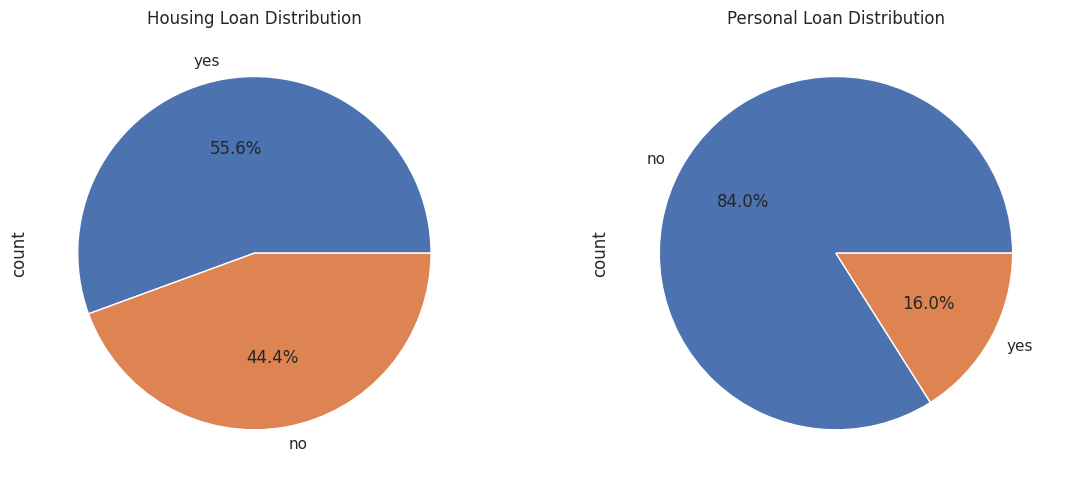

In [22]:
# Housing and Loan Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['housing'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Housing Loan Distribution')

plt.subplot(1, 2, 2)
df['loan'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Personal Loan Distribution')
plt.tight_layout()
plt.show()

In [24]:
# Average Balance by Job
# plt.figure(figsize=(12, 6))
df['job_balance'] = df.groupby('job')['balance'].transform('mean')
# df['job_balance'].plot(kind='bar')
# plt.title('Average Balance by Job Type')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

In [25]:
df = df.drop(columns=['job','balance'])

In [26]:
num_cols = df.select_dtypes(include='number')

# Data Cleaning

> Dealing with Outliers

In [27]:
df.describe()

,age,day,duration,campaign,pdays,previous,job_balance
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841,40.197828,0.580323,1362.272058
std,10.618762,8.322476,257.527812,3.098021,100.128746,2.303441,309.883424
min,18.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,997.088108
25%,33.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1078.826654
50%,39.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1252.632092
75%,48.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1763.616832
max,95.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1984.215106


In [28]:
df

,age,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_balance
0,58,married,tertiary,no,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1763.616832
1,44,single,secondary,no,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1252.632092
2,33,married,secondary,no,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1521.470074
3,47,married,unknown,no,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1078.826654
4,33,single,unknown,no,no,no,unknown,5,may,198,1,-1,0,unknown,no,1772.357639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,no,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1252.632092
45207,71,divorced,primary,no,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1984.215106
45208,72,married,secondary,no,no,no,cellular,17,nov,1127,5,184,3,success,yes,1984.215106
45209,57,married,secondary,no,no,no,telephone,17,nov,508,4,-1,0,unknown,no,1078.826654


In [29]:
# Create a copy of the original DataFrame for capping the outliers.
df_capped = df.copy()

# Iterate through each numeric column to find and cap outliers.
for i in num_cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    print(f'{i}: Upper limit = {upper_limit}')
    print(f'{i}: Lower limit = {lower_limit}')


    # Find outliers above and below the limits.
    outliers_upper = np.where(df[i] > upper_limit)[0]
    outliers_lower = np.where(df[i] < lower_limit)[0]

    # Cap the outliers for the current column.
    df_capped[i] = np.where(
        df_capped[i] > upper_limit,
        upper_limit,
        np.where(
            df_capped[i] < lower_limit,
            lower_limit,
            df_capped[i]
        )
    )

    print("Successful Capping ;) ")

age: Upper limit = 70.5
age: Lower limit = 10.5
Successful Capping ;) 
day: Upper limit = 40.5
day: Lower limit = -11.5
Successful Capping ;) 
duration: Upper limit = 643.0
duration: Lower limit = -221.0
Successful Capping ;) 
campaign: Upper limit = 6.0
campaign: Lower limit = -2.0
Successful Capping ;) 
pdays: Upper limit = -1.0
pdays: Lower limit = -1.0
Successful Capping ;) 
previous: Upper limit = 0.0
previous: Lower limit = 0.0
Successful Capping ;) 
job_balance: Upper limit = 2790.8020992738616
job_balance: Lower limit = 51.64138737361964
Successful Capping ;) 


In [30]:
df_capped.describe()

,age,day,duration,campaign,pdays,previous,job_balance
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.0,45211.0,45211.000000
mean,40.868185,15.806419,234.939307,2.392228,-1.0,0.0,1362.272058
std,10.394895,8.322476,176.749932,1.600111,0.0,0.0,309.883424
min,18.000000,1.000000,0.000000,1.000000,-1.0,0.0,997.088108
25%,33.000000,8.000000,103.000000,1.000000,-1.0,0.0,1078.826654
50%,39.000000,16.000000,180.000000,2.000000,-1.0,0.0,1252.632092
75%,48.000000,21.000000,319.000000,3.000000,-1.0,0.0,1763.616832
max,70.500000,31.000000,643.000000,6.000000,-1.0,0.0,1984.215106


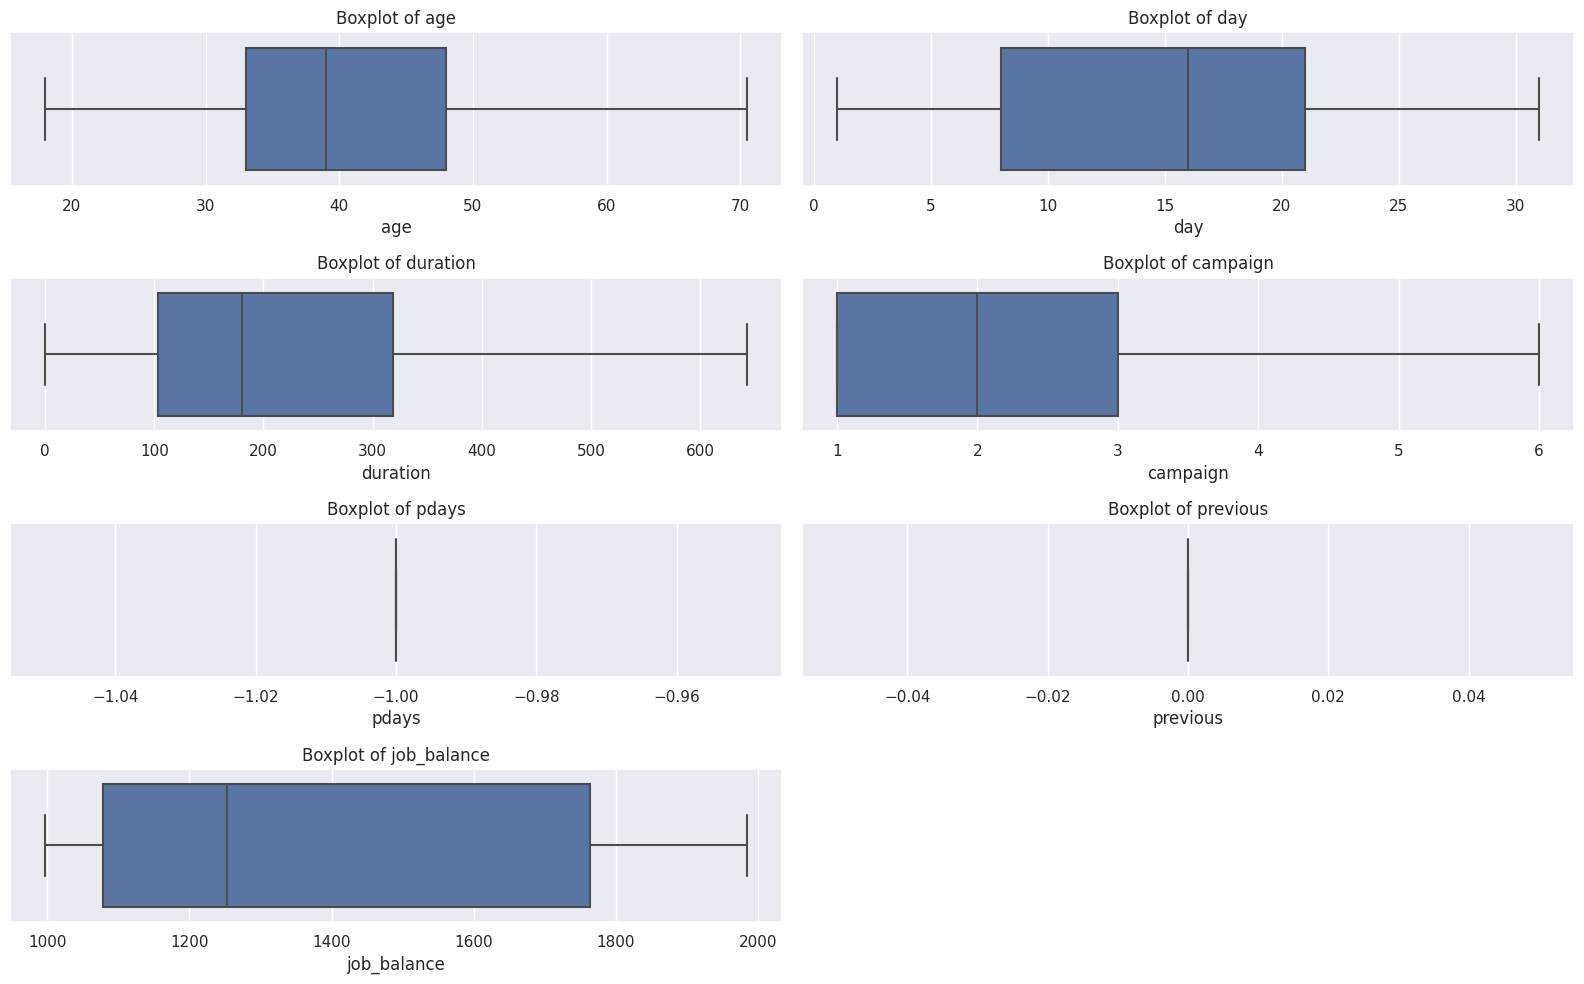

In [31]:
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
for i, column in enumerate(num_cols.columns):
    plt.subplot(len(num_cols.columns)//2 + 1, 2, i + 1)
    sns.boxplot(x=df_capped[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

> Filling the missing values

* poutcome
* pdays
* contact
  
These columns contain missing values marked as 'unknown'

In [32]:
from sklearn.impute import KNNImputer , SimpleImputer 
from sklearn.compose import ColumnTransformer

In [33]:
knn = KNNImputer(missing_values='unknown',add_indicator=True,n_neighbors=10)
si = SimpleImputer(missing_values='unknown',strategy='most_frequent',add_indicator=True)

In [34]:
clf = ColumnTransformer(transformers=[
    ('tf1',knn,['pdays']),
    ('tf2',si,['poutcome','contact'])
],remainder='passthrough')

In [35]:
df_trf = clf.fit_transform(df_capped)

In [36]:
df_trf = pd.DataFrame(df_trf , columns = clf.get_feature_names_out())

In [37]:
df_trf

,tf1__pdays,tf2__poutcome,tf2__contact,tf2__missingindicator_poutcome,tf2__missingindicator_contact,remainder__age,remainder__marital,remainder__education,remainder__default,remainder__housing,remainder__loan,remainder__day,remainder__month,remainder__duration,remainder__campaign,remainder__previous,remainder__y,remainder__job_balance
0,-1.0,failure,cellular,True,True,58.0,married,tertiary,no,yes,no,5.0,may,261.0,1.0,0.0,no,1763.616832
1,-1.0,failure,cellular,True,True,44.0,single,secondary,no,yes,no,5.0,may,151.0,1.0,0.0,no,1252.632092
2,-1.0,failure,cellular,True,True,33.0,married,secondary,no,yes,yes,5.0,may,76.0,1.0,0.0,no,1521.470074
3,-1.0,failure,cellular,True,True,47.0,married,unknown,no,yes,no,5.0,may,92.0,1.0,0.0,no,1078.826654
4,-1.0,failure,cellular,True,True,33.0,single,unknown,no,no,no,5.0,may,198.0,1.0,0.0,no,1772.357639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,-1.0,failure,cellular,True,False,51.0,married,tertiary,no,no,no,17.0,nov,643.0,3.0,0.0,yes,1252.632092
45207,-1.0,failure,cellular,True,False,70.5,divorced,primary,no,no,no,17.0,nov,456.0,2.0,0.0,yes,1984.215106
45208,-1.0,success,cellular,False,False,70.5,married,secondary,no,no,no,17.0,nov,643.0,5.0,0.0,yes,1984.215106
45209,-1.0,failure,telephone,True,False,57.0,married,secondary,no,no,no,17.0,nov,508.0,4.0,0.0,no,1078.826654


<Axes: xlabel='tf2__contact', ylabel='count'>

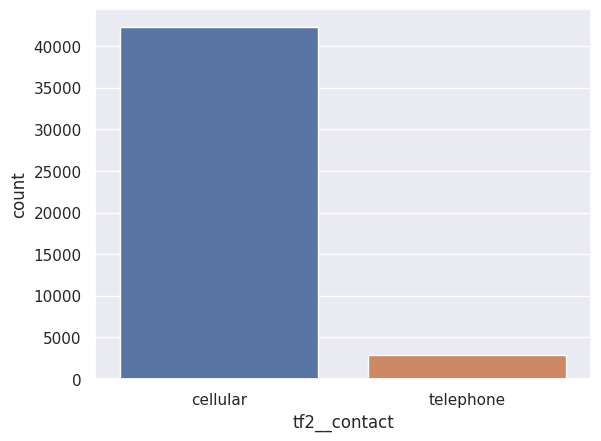

In [38]:
sns.countplot(x=df_trf['tf2__contact'])

<Axes: xlabel='tf2__poutcome', ylabel='count'>

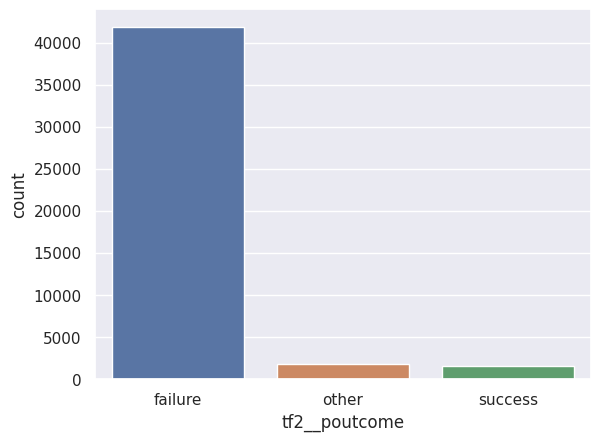

In [39]:
sns.countplot(x=df_trf['tf2__poutcome'])

# Encoding the categorical variables 

In [40]:
df_trf = df_trf.drop(columns='remainder__month')

In [41]:
x = df_trf.drop(columns=['remainder__y'])  # Exclude target column from features
y = df_trf['remainder__y']  # Target column

In [42]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , OrdinalEncoder

In [43]:
le = LabelEncoder()
ohe = OneHotEncoder(drop='first',sparse_output=False)
oe = OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary', 'unknown']], unknown_value=4, handle_unknown="use_encoded_value")

In [44]:
df_trf.sample()

,tf1__pdays,tf2__poutcome,tf2__contact,tf2__missingindicator_poutcome,tf2__missingindicator_contact,remainder__age,remainder__marital,remainder__education,remainder__default,remainder__housing,remainder__loan,remainder__day,remainder__duration,remainder__campaign,remainder__previous,remainder__y,remainder__job_balance
42760,-1.0,failure,cellular,True,False,44.0,married,secondary,no,yes,no,28.0,180.0,2.0,0.0,no,1135.838909


In [45]:
df_trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   tf1__pdays                      45211 non-null  object
 1   tf2__poutcome                   45211 non-null  object
 2   tf2__contact                    45211 non-null  object
 3   tf2__missingindicator_poutcome  45211 non-null  object
 4   tf2__missingindicator_contact   45211 non-null  object
 5   remainder__age                  45211 non-null  object
 6   remainder__marital              45211 non-null  object
 7   remainder__education            45211 non-null  object
 8   remainder__default              45211 non-null  object
 9   remainder__housing              45211 non-null  object
 10  remainder__loan                 45211 non-null  object
 11  remainder__day                  45211 non-null  object
 12  remainder__duration             45211 non-null

In [46]:
clf2 = ColumnTransformer(transformers=[
    ('tf3',ohe,[1,2,3,4,6,8,9,10]),
    ('tf4',oe,['remainder__education'])
],remainder='passthrough')

In [47]:
x_encoded = clf2.fit_transform(x)

In [48]:
x_encoded = pd.DataFrame(x_encoded,columns=clf2.get_feature_names_out())

In [49]:
y_encoded = le.fit_transform(y)

In [50]:
x_encoded

,tf3__tf2__poutcome_other,tf3__tf2__poutcome_success,tf3__tf2__contact_telephone,tf3__tf2__missingindicator_poutcome_True,tf3__tf2__missingindicator_contact_True,tf3__remainder__marital_married,tf3__remainder__marital_single,tf3__remainder__default_yes,tf3__remainder__housing_yes,tf3__remainder__loan_yes,tf4__remainder__education,remainder__tf1__pdays,remainder__remainder__age,remainder__remainder__day,remainder__remainder__duration,remainder__remainder__campaign,remainder__remainder__previous,remainder__remainder__job_balance
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,-1.0,58.0,5.0,261.0,1.0,0.0,1763.616832
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,-1.0,44.0,5.0,151.0,1.0,0.0,1252.632092
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,-1.0,33.0,5.0,76.0,1.0,0.0,1521.470074
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,-1.0,47.0,5.0,92.0,1.0,0.0,1078.826654
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,-1.0,33.0,5.0,198.0,1.0,0.0,1772.357639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,-1.0,51.0,17.0,643.0,3.0,0.0,1252.632092
45207,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,70.5,17.0,456.0,2.0,0.0,1984.215106
45208,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,70.5,17.0,643.0,5.0,0.0,1984.215106
45209,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,57.0,17.0,508.0,4.0,0.0,1078.826654


In [51]:
y_encoded

array([0, 0, 0, ..., 1, 0, 0])

# Train-Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train , x_test , y_train , y_test = train_test_split(x_encoded,y_encoded,test_size=0.3,random_state=365)

In [54]:
x_train.shape

(31647, 18)

In [55]:
y_train.shape

(31647,)

# Model Building

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score ,KFold

In [57]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
accuracy_score(y_test,y_pred)

0.8574904158065467

# Cross-Validation

In [58]:
# Create the logistic regression model
dtc = DecisionTreeClassifier()

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(dtc, x_encoded, y_encoded, cv=kf, scoring='accuracy')

# Print cross-validation results
print("Cross-validation accuracy scores:", cv_scores)
print(f"Mean accuracy score: {cv_scores.mean():.4f}")
print(f"Standard deviation of accuracy scores: {cv_scores.std():.4f}")

Cross-validation accuracy scores: [0.86155037 0.8605397  0.8562265  0.85954435 0.86009732]
Mean accuracy score: 0.8596
Standard deviation of accuracy scores: 0.0018


# PCA and Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [60]:
scale = StandardScaler()

In [61]:
clf3 = ColumnTransformer(transformers=[
    ('tf5',scale,x_train.columns)
],remainder='passthrough')

In [62]:
x_train_scaled = clf3.fit_transform(x_train)
x_test_scaled = clf3.transform(x_test)

In [63]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=clf3.get_feature_names_out())
x_test_scaled = pd.DataFrame(x_test_scaled,columns=clf3.get_feature_names_out())

In [64]:
for i in range(1,17):
    pca = PCA(n_components=i)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)
    dtc.fit(x_train_pca,y_train)
    y_pred = dtc.predict(x_test_pca)
    print(f'Decision Tree Classifier with {i} PCA components: Accuracy = {accuracy_score(y_test, y_pred)}')


Decision Tree Classifier with 1 PCA components: Accuracy = 0.8020495429076968
Decision Tree Classifier with 2 PCA components: Accuracy = 0.8181214980831613
Decision Tree Classifier with 3 PCA components: Accuracy = 0.8236508404600413
Decision Tree Classifier with 4 PCA components: Accuracy = 0.8282217634915954
Decision Tree Classifier with 5 PCA components: Accuracy = 0.8351518726039516
Decision Tree Classifier with 6 PCA components: Accuracy = 0.8452521380123857
Decision Tree Classifier with 7 PCA components: Accuracy = 0.8453995871424359
Decision Tree Classifier with 8 PCA components: Accuracy = 0.8490858153936892
Decision Tree Classifier with 9 PCA components: Accuracy = 0.8512975523444412
Decision Tree Classifier with 10 PCA components: Accuracy = 0.8530669419050427
Decision Tree Classifier with 11 PCA components: Accuracy = 0.8534355647301681
Decision Tree Classifier with 12 PCA components: Accuracy = 0.8539516366853436
Decision Tree Classifier with 13 PCA components: Accuracy = 0